# SWEDISH ENTREPRENEURSHIP WORD NETS
## I: Sententially Co-Occurring Topic Modeling Terms 

## By Moses Boudourides & Karl Wennberg

In [1]:
import os
# os.chdir("/home/nas/googledrive/CherratGopee&Taktak/")
import wikipedia
import random, operator, re, string, copy, dateutil.parser, itertools, pickle, datetime, math, pandas as pd, numpy as np, matplotlib.pyplot as plt, networkx as nx, community, pygraphviz
np.random.seed(2018)
from collections import Counter
from networkx.drawing.nx_agraph import graphviz_layout
from string import punctuation, digits
import nltk
# nltk.download('wordnet')
from nltk.stem.porter import *
stemmer = PorterStemmer()
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet as wn
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models
from gensim.corpora import Dictionary
import pyLDAvis
from pyLDAvis import gensim as pgensim
pyLDAvis.enable_notebook()
import matplotlib.pyplot as plt
import seaborn as sns
import codecs
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.simplefilter('ignore')

### Load Data

In [2]:
filename = "data/entrepreneur1995.txt"
titlename = "The Swedish Entrepreneurship Data"
f = codecs.open(filename, "r", encoding="utf-8").readlines()
num_lines = 0
num_words = 0
num_chars = 0
for line in f:
    words = line.split()
    num_lines += 1
    num_words += len(words)
    num_chars += len(line)
print "%s has number of words = %i (and number of characters/symbols = %i)" %(titlename,num_words,num_chars)

The Swedish Entrepreneurship Data has number of words = 77978 (and number of characters/symbols = 558998)


In [3]:
filenames = ["data/entrepreneur1995.txt","data/entrepreneur2005.txt","data/entrepreneur2019.txt",
             "data/startup1995.txt","data/startup2005.txt","data/startup2019.txt"]
titlename = "The Swedish Entrepreneurship Data"

F=[]
num_lines = 0
num_words = 0
num_chars = 0
for filename in filenames:
    f = codecs.open(filename, "r", encoding="utf-8").readlines()
    for line in f:
        words = line.split()
        num_lines += 1
        num_words += len(words)
        num_chars += len(line)
print "%s has number of words = %i (and number of characters/symbols = %i)" %(titlename,num_words,num_chars)
# print "%s has number of words = %i" %(titlename,num_words)
# blob = TextBlob("\n".join(f))

The Swedish Entrepreneurship Data has number of words = 469876 (and number of characters/symbols = 3267302)


In [4]:
text=[]
for filename in filenames:
    f = codecs.open(filename, "r", encoding="utf-8").readlines()
    textf="\n".join(f).split("==============================================================================")
    text.append(textf)
for textf in text:
    print text.index(textf),len(textf),type(textf)


# nas=[]
# for a in text:
#     for c in a:
#         if ord(c) < 0 or ord(c) > 127:
#             if a not in nas:
#                 nas.append(a)
# for t in text:
#     for x in nas:
#         t.replace("x","")
# text=[w.encode('utf8').decode('utf8').encode("ascii","ignore") for w in text]

docs_d={}
for i,j in enumerate(text):
    if i==0:
        for ii,jj in enumerate(j):
            docs_d["Entrepreneur1995"+str(ii+1)]=jj
    if i==1:
        for ii,jj in enumerate(j):
            docs_d["Entrepreneur2005"+str(ii+1)]=jj
    if i==2:
        for ii,jj in enumerate(j):
            docs_d["Entrepreneur2019"+str(ii+1)]=jj
    if i==3:
        for ii,jj in enumerate(j):
            docs_d["Startup1995"+str(ii+1)]=jj
    if i==4:
        for ii,jj in enumerate(j):
            docs_d["Startup2005"+str(ii+1)]=jj
    if i==5:
        for ii,jj in enumerate(j):
            docs_d["Startup2019"+str(ii+1)]=jj
print len(docs_d)
docs=docs_d.values()
print len(docs)
# docs

0 180 <type 'list'>
1 598 <type 'list'>
2 86 <type 'list'>
3 1 <type 'list'>
4 4 <type 'list'>
5 123 <type 'list'>
992
992


In [5]:
# docs2_d={}
# for k,v in docs_d.items():
#     if "Entrepreneur2005" in k:
#         docs2_d[k]=v
# print len(docs2_d)
# docs=docs2_d.values()
# print len(docs)
# docs

### Extraction of Terms from Topic Modeling

In [6]:
excluded = stopwords.words('swedish') + list(punctuation) 

def tokenize(text):
    words = word_tokenize(text)
    words = [w.lower() for w in words]
    return [w for w in words if w not in excluded and not w.isdigit()] #stop_words
 
vocabulary = set()
for i in docs:
    words = tokenize(i)
    vocabulary.update(words)
 
vocabulary = list(vocabulary)
word_index = {w: idx for idx, w in enumerate(vocabulary)}
 
VOCABULARY_SIZE = len(vocabulary)
DOCUMENTS_COUNT = len(docs)
 
print VOCABULARY_SIZE, DOCUMENTS_COUNT  #All: 43062 992

43062 992


In [7]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [8]:
documents=docs
doc_sample = documents[0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
[u'\r\n\n\r\n\nSTENHAMMAR', u'BLIR', u'OS-GENERAL\r\n\nTidningarnas', u'Telegrambyr\xe5,', u'1995-12-07', u'04:38\r\n\nPublicerat', u'i', u'print.', u'\r\n\n\r\n\nOlof', u'Stenhammar,', u'VD', u'och', u'grundare', u'av', u'OM', u'(Optionsm\xe4klarna)', u'blir', u'OS-', u'-general', u'f\xf6r', u'Stockholms', u'\r\n\nkandidatur', u'till', u'sommarspelen', u'2004.\r\n\n\r\n\nHan', u'kommer', u'sannolikt', u'att', u'presenteras', u'officiellt', u'p\xe5', u'en', u'presskonferens', u'i', u'Stockholms', u'\r\n\nstadshus', u'p\xe5', u'torsdagen,', u'skriver', u'Svenska', u'Dagbladet.', u'Olof', u'Stenhammar', u'blir', u'verkst\xe4llande', u'\r\n\ndirekt\xf6r', u'f\xf6r', u'det', u'nya', u'OS-', u'-aktiebolaget', u'som', u'skall', u'leda', u'Stockholms', u'ans\xf6kan.', u'\r\n\nStenhammar', u'startade', u'OM', u'i', u'mitten', u'av', u'1980-talet', u'och', u'f\xf6retaget', u'blev', u'snabbt', u'en', u'stor', u'\r\n\nframg\xe5ng.', u'Han', u's\xe4gs', u'vara', u'en', u'skickl

In [9]:
rd={}
# {u"kenni":u"kenny",u"kennedi":u"kennedy",u"jewelri":u"jewelry",u"dolli":u"dolly",u"jerri":u"jerry",
#     u"scari":u"scary",u"academi":u"academi",u"societi":u"society",u"sothebi":u"sotheby",u"beverli":u"beverly",u"lobbi":u"lobby"}

pdocs=[preprocess(doc) for doc in documents]

ppdocs=[]
for s in pdocs:
    for i in range(len(s)):
        for k in rd.keys():  #,v in rd.items():
            if k == s[i]:
                s[i]=rd[k]
    ppdocs.append(s)

# for s in ppdocs:
#     for i in range(len(s)):
#         for k,v in rd.items():
#             if k == s[i]:
#                 print k

In [10]:
# processed_docs = [preprocess(doc) for doc in documents]
# processed_docs[:10]

excl=[]
# [
#     u'say',u'go',u'like',u'didnt',u'tell',u'come',u'want',u'call',u'dont',u'fred',u'girl',u'give',u'good',u'know',u'leav',u'look',u'parti',u'peopl',
#     u'she',u'take',u'talk',u'thing',u'think',u'work',u'ask',u'get',u'great',u'hous',u'lunch',u'mean',u'offic',u'anybodi',u'februari',u'januari',
#     u'place',u'saturday',u'friday',u'sunday',u'right',u'time',u'walk',u'wednesday',u'year',u'theyr',u'thursday',u'tri',u'wasnt',u'pick',u'be',
#     u'her',u'that',u'out',u'ith',u'up',u'one',u'you',u'ell',u'who',u'how',u'monday',u'tuesday',u'everybodi',u'dinner',u'interview',u'larri'
    
    
#     u'andi', u'answer', u'anymor', u'april', u'arriv', u'articl', u'august', u'avenu', u'aw', u'babi', u'barri', u'beauti', u'believ', u'billi',
#     u'birthday', u'black', u'blond', u'blue', u'boat', u'bobbi', u'bodi', u'book', u'boy', u'busi', u'care', u'carri', u'catherin', u'chang', 
#     u'chic', u'chri', u'christma', u'christoph', u'church', u'citi', u'close', u'cloth', u'cold', u'copi', u'corner', u'cost', u'coupl', u'cover',
#     u'crazi', u'cri', u'cute', u'danc', u'debbi', u'decid', u'denni', u'dian', u'doctor', u'dolly', u'earli', u'east', u'eat', u'elev', 
#     u'embarrass', u'english', u'excit', u'eye', u'face', u'fairi', u'famili', u'famou', u'fell', u'felt', u'fifth', u'figur', u'funni', u'galleri',
#     u'georg', u'guy', u'hand', u'happi', u'hard', u'harri', u'hat', u'hate', u'hello', u'help', u'henri', u'high', u'hold', u'holzer', u'home', 
#     u'horribl', u'hospit', u'introduc', u'invit', u'issu', u'jack', u'jacki', u'jam', u'jami', u'juli', u'june', u'keep', u'ladi', u'late', 
#     u'lidija', u'littl', u'liza', u'long', u'lose', u'lot', u'love', u'magazin', u'mako', u'march', u'mari', u'marri', u'mayb', u'mick', u'minut',
#     u'miss', u'montauk', u'movi', u'name', u'nervou', u'news', u'newspap', u'nice', u'night', u'nose', u'note', u'notic', u'novemb', u'number', 
#     u'octob', u'order', u'paloma', u'pari', u'pay', u'photo', u'pictur', u'piec', u'pretti', u'print', u'probabl', u'put', u'queen', u'readi', 
#     u'realiz', u'recogn', u'reinhold', u'restaur', u'ronni', u'ross', u'rubel', u'run', u'scar', u'sell', u'septemb', u'serv', u'sick', u'sign', 
#     u'sing', u'sit', u'sixti', u'somebodi', u'squar', u'stay', u'steal', u'stevi', u'stick', u'stop', u'stori', u'strang', u'stuff', u'suit', 
#     u'suppos', u'sure', u'surpris', u'suzi', u'start', u'tabl', u'halston', u'tap', u'tape', u'terribl', u'thank', u'thirti', u'thoma', u'ticket', 
#     u'till', u'tire', u'toni', u'truman', u'turn', u'type', u'upstair', u'usual', u'voic', u'vreeland', u'wait', u'wake', u'wall', u'wear', u'wed',
#     u'week', u'weekend', u'west', u'white', u'wife', u'wish', u'woman', u'street', u'word', u'world', u'write', u'yoko', u'york',u'paint',u'guess',
#     u'matti',u'larri',u'perski',u'suddenli',u'nutti',u'friendli',u'kitti',u'bianca',u'room',u'cab'
# ]

# starts with u"..."
processed_docs = ppdocs #[preprocess(doc) for doc in documents]
processed_docs1=[]
for x in processed_docs:
    y=[]
    for xx in x:
        if xx not in excl:
            y.append(xx)
    processed_docs1.append(y)
processed_docs=processed_docs1
allw=[]
for x in processed_docs:
    for xx in x:
        if xx not in allw:
            allw.append(xx)
print len(allw) #All 32368
# processed_docs[:10]

32501


In [11]:
dictionary = gensim.corpora.Dictionary(processed_docs)
print len(dictionary) #All 32368
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

32501
(3822, u'vanligast')
(15520, u'nallen')
(16232, u'nordisk')
(18854, u'exkluderar')
(505, u'\xf6rtendahl')
(26411, u'suzann')
(20426, u'poliscanova')
(7727, u'hanterligt')
(12625, u'riskvilliga')
(26287, u'scola')
(14311, u'huvudsaken')


In [12]:
dictionary.filter_extremes(no_below=2, no_above=2, keep_n=300)
#                            keep_n=100000) #3 0.7 | 15 0.5
len(dictionary) #All 15838 [2: 10955 with keep_n=100000]

300

In [13]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
# bow_corpus[43]

In [14]:
nt=4 #number_of_topics
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=nt, id2word=dictionary, passes=2, workers=2)

In [15]:
topics = lda_model.print_topics(num_words=100) #350

terms=[]
lt=[]
for i in range(nt):
    for t in topics: 
        lt.append(t[1].split(" + "))
import re
for s in lt:
    for ss in s:
        if re.sub(r'[^a-zA-Z]','', ss) not in terms:
            terms.append(re.sub(r'[^a-zA-Z]','', ss))
terms=sorted(terms)
print len(terms)
terms

154


[u'aftonbladet',
 u'aldrig',
 u'alla',
 u'allt',
 u'andra',
 u'annat',
 u'artikeln',
 u'artiklar',
 u'avtalslicen',
 u'bara',
 u'bde',
 u'behver',
 u'bildtext',
 u'bland',
 u'blev',
 u'blir',
 u'bolag',
 u'bolaget',
 u'bonnier',
 u'dagbladet',
 u'dagen',
 u'databasen',
 u'detta',
 u'distribuera',
 u'efter',
 u'eftersom',
 u'egna',
 u'eller',
 u'enligt',
 u'enskild',
 u'entreprenr',
 u'expressen',
 u'familj',
 u'fick',
 u'finn',
 u'fler',
 u'flera',
 u'fljer',
 u'fram',
 u'framtiden',
 u'fredric',
 u'fretag',
 u'fretaget',
 u'frfattar',
 u'frn',
 u'frsta',
 u'ftt',
 u'fyra',
 u'gener',
 u'genom',
 u'gjord',
 u'glland',
 u'gng',
 u'godknnand',
 u'gra',
 u'granstrm',
 u'grundar',
 u'hade',
 u'han',
 u'hela',
 u'helt',
 u'henn',
 u'http',
 u'info',
 u'ingen',
 u'inget',
 u'inom',
 u'int',
 u'kansk',
 u'karn',
 u'kla',
 u'kommer',
 u'kopiera',
 u'kronor',
 u'kund',
 u'kunna',
 u'landet',
 u'lite',
 u'maria',
 u'medgivand',
 u'medium',
 u'mellan',
 u'mest',
 u'miljard',
 u'miljon',
 u'mnga',

In [16]:
sss=[]
for idx, topic in lda_model.print_topics(-1):
    tt=[]
    s=topic.split(" + ")
    ss=[]
    uu=[]
    for t in s:
        u0=float(t.split("*")[0])
        u1=t.split("*")[1].replace('"','')
        if (u1,u0) not in ss:
            ss.append((u1,u0))
        if t not in uu:
            uu.append(t) 
    sss.append(ss)
    topic=" + ".join(uu).encode('utf-8')
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.044*"till" + 0.036*"int" + 0.024*"från" + 0.024*"svenska" + 0.018*"eller" + 0.017*"dagbladet" + 0.013*"artiklar" + 0.012*"alla" + 0.011*"hela" + 0.011*"retriev"
Topic: 1 
Words: 0.037*"int" + 0.036*"eller" + 0.034*"artiklar" + 0.032*"till" + 0.030*"annat" + 0.024*"från" + 0.020*"alla" + 0.019*"retriev" + 0.017*"hela" + 0.017*"artikeln"
Topic: 2 
Words: 0.037*"int" + 0.035*"från" + 0.034*"till" + 0.025*"eller" + 0.018*"hade" + 0.017*"alla" + 0.015*"dagbladet" + 0.015*"artiklar" + 0.014*"retriev" + 0.014*"svenska"
Topic: 3 
Words: 0.048*"till" + 0.024*"säger" + 0.023*"svenska" + 0.021*"int" + 0.019*"eller" + 0.017*"dagbladet" + 0.014*"från" + 0.012*"sverig" + 0.012*"entreprenör" + 0.012*"över"


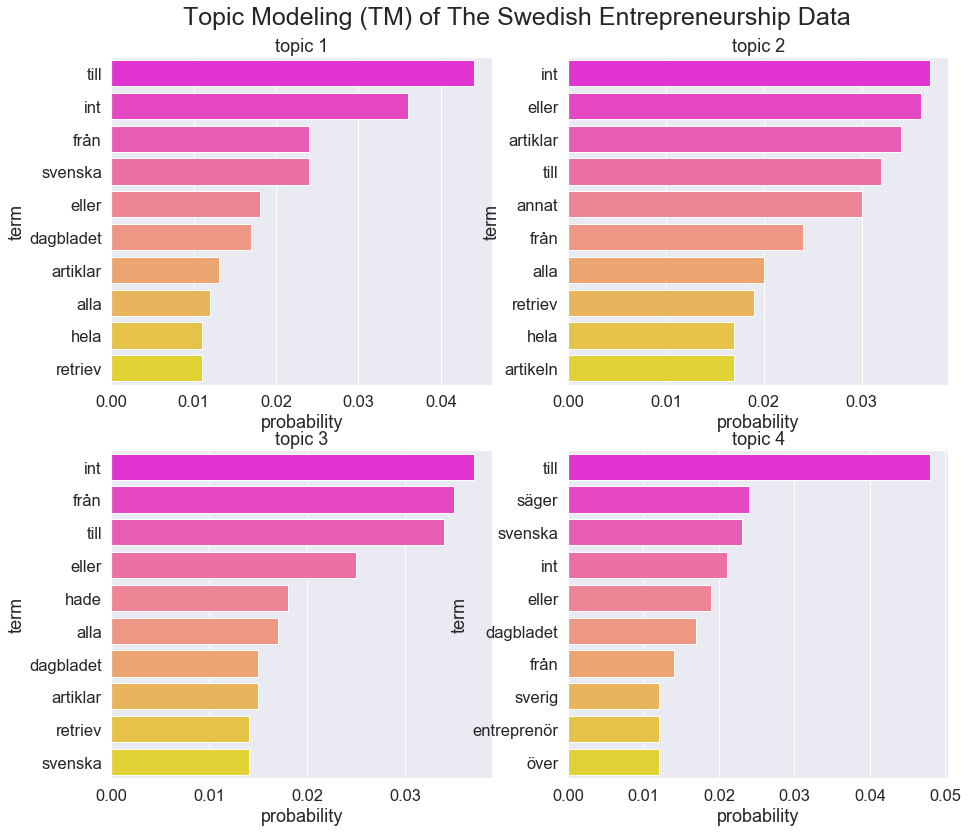

In [17]:
plt.figure(figsize=(15,35)) #figsize=(15,2.4*15*((nt+1)/4))); #15
for i in range(nt):
    sns.set(font_scale = 1.5)
    df=pd.DataFrame(sss[i], columns=['term','prob']).set_index('term')
    plt.subplot(nt+1,2,i+1); #5
    plt.title('topic '+str(i+1));
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='spring');
    plt.xlabel('probability');
sst="Topic Modeling (TM) of %s" %titlename
plt.suptitle(sst,fontsize=25, y=0.90);
plt.show()

In [18]:
from pyLDAvis import gensim as pgensim
vis = pgensim.prepare(lda_model,bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
0      39.622829        1       1  0.053388  0.006209
2      21.554222        1       2  0.024152  0.016720
1      21.357920        1       3 -0.119574 -0.001414
3      17.465036        1       4  0.042034 -0.021516, topic_info=    Category         Freq         Term        Total  loglift  logprob
51   Default  1134.000000        annat  1134.000000  30.0000  30.0000
67   Default   358.000000    medgivand   358.000000  29.0000  29.0000
187  Default   359.000000         uten   359.000000  28.0000  28.0000
229  Default   359.000000    översätta   359.000000  27.0000  27.0000
151  Default   360.000000  avtalslicen   360.000000  26.0000  26.0000
159  Default   361.000000       medium   361.000000  25.0000  25.0000
0    Default   363.000000      kopiera   363.000000  24.0000  24.0000
167  Default   364.000000     överföra   364.000000  23.0000  23.0000
79   Default   379.000000      bonnier   379.000000  22.0000  22.0000
186  Default   390.000000       följer   390.000000  21.0000  21.0000
42   Default   376.000000      gälland   376.000000  20.0000  20.0000
233  Default  1886.000000     artiklar  1886.000000  19.0000  19.0000
5    Default  1177.000000        säger  1177.000000  18.0000  18.0000
91   Default   455.000000    expressen   455.000000  17.0000  17.0000
75   Default  1855.000000      svenska  1855.000000  16.0000  16.0000
296  Default  1470.000000    dagbladet  1470.000000  15.0000  15.0000
24   Default   759.000000         hade   759.000000  14.0000  14.0000
213  Default   446.000000     särskilt   446.000000  13.0000  13.0000
256  Default  2582.000000        eller  2582.000000  12.0000  12.0000
215  Default   205.000000    granström   205.000000  11.0000  11.0000
216  Default   440.000000  sydsvenskan   440.000000  10.0000  10.0000
208  Default   206.000000          kla   206.000000   9.0000   9.0000
273  Default   267.000000   wolodarski   267.000000   8.0000   8.0000
271  Default   214.000000    rehnquist   214.000000   7.0000   7.0000
258  Default  4388.000000         till  4388.000000   6.0000   6.0000
294  Default   558.000000        nyhet   558.000000   5.0000   5.0000
185  Default   654.000000        dagen   654.000000   4.0000   4.0000
11   Default   794.000000       enligt   794.000000   3.0000   3.0000
19   Default   673.000000      sektion   673.000000   2.0000   2.0000
251  Default   397.000000        peter   397.000000   1.0000   1.0000
..       ...          ...          ...          ...      ...      ...
244   Topic4    64.892929      stället   226.638992   0.4943  -5.6884
69    Topic4   235.727554       sverig   827.945496   0.4887  -4.3984
110   Topic4    29.314426      intress   103.030884   0.4880  -6.4830
45    Topic4   233.093277  entreprenör   866.754272   0.4317  -4.4097
211   Topic4    97.402390      procent   355.826904   0.4494  -5.2823
75    Topic4   444.192505      svenska  1855.230591   0.3155  -3.7649
258   Topic4   919.368164         till  4388.720703   0.1819  -3.0374
296   Topic4   334.657318    dagbladet  1470.812012   0.2645  -4.0480
259   Topic4   202.601028       kommer   835.128967   0.3286  -4.5499
205   Topic4   193.873001        också   814.585571   0.3095  -4.5939
216   Topic4   109.263046  sydsvenskan   440.965393   0.3498  -5.1674
26    Topic4   150.193024        många   666.163818   0.2554  -4.8492
28    Topic4   137.293625         allt   603.610962   0.2642  -4.9390
58    Topic4   113.655891      företag   471.299591   0.3227  -5.1279
256   Topic4   365.607605        eller  2582.533936  -0.2100  -3.9595
139   Topic4   140.727386       mycket   663.045166   0.1950  -4.9143
232   Topic4   408.151886          int  3707.451172  -0.4615  -3.8495
72    Topic4   125.331047         bara   569.703064   0.2308  -5.0302
277   Topic4   150.029053        sedan   775.862610   0.1018  -4.8503
132   Topic4   223.741669         alla  1598.959229  -0.2216  -

In [19]:
ted={}
for k,v in docs_d.items():
    t=[]
    for w in terms: 
        if w in v:
            if w not in t:
                t.append(w)
    ted[k]=sorted(t)
print len(ted)
# for k,v in ted.items():
#     print k,v

992


In [20]:
freq=[]
for k in terms: 
    s=0
    for kk,v in docs_d.items():
        v=v.lower()
        s+=v.count(k)
    freq.append(s)
trf_df = pd.DataFrame(
    {'Term': terms, 
     'Frequency of Occurrences': freq
    })
trf_df=trf_df[['Term','Frequency of Occurrences']]
trf_df=trf_df.sort_values(by ='Frequency of Occurrences',ascending=False)
trf_df=trf_df[trf_df["Frequency of Occurrences"]>100]
print len(trf_df)
trf_df

123


,Term,Frequency of Occurrences
147,ver,7276
67,int,5820
134,till,5766
107,ret,4734
58,han,4596
146,ven,3815
70,kla,3703
127,str,3398
27,eller,2856
129,svenska,2351


In [21]:
# terms=[]
# for i in range(nt):
#     print list(lda_model.show_topic(i))
#     for t in list(lda_model.show_topic(i)):
#         term=t[0]
#         if term not in terms:
#             terms.append(term)
#     print
# terms=sorted(terms)
# print len(terms)
# terms

In [22]:
# dterms=dictionary.values()
# len(dterms)

In [23]:
trf_df.to_csv('terms_freqs.csv')

In [24]:
# rem=[u'be',u'her',u'that',u'out',u'ith',u'up',u'one',u'you',u'ell',u'who',u'how']

In [25]:
tterms=list(set(terms+trf_df['Term'].tolist()[:70]))
print len(tterms)
sorted(tterms)

154


[u'aftonbladet',
 u'aldrig',
 u'alla',
 u'allt',
 u'andra',
 u'annat',
 u'artikeln',
 u'artiklar',
 u'avtalslicen',
 u'bara',
 u'bde',
 u'behver',
 u'bildtext',
 u'bland',
 u'blev',
 u'blir',
 u'bolag',
 u'bolaget',
 u'bonnier',
 u'dagbladet',
 u'dagen',
 u'databasen',
 u'detta',
 u'distribuera',
 u'efter',
 u'eftersom',
 u'egna',
 u'eller',
 u'enligt',
 u'enskild',
 u'entreprenr',
 u'expressen',
 u'familj',
 u'fick',
 u'finn',
 u'fler',
 u'flera',
 u'fljer',
 u'fram',
 u'framtiden',
 u'fredric',
 u'fretag',
 u'fretaget',
 u'frfattar',
 u'frn',
 u'frsta',
 u'ftt',
 u'fyra',
 u'gener',
 u'genom',
 u'gjord',
 u'glland',
 u'gng',
 u'godknnand',
 u'gra',
 u'granstrm',
 u'grundar',
 u'hade',
 u'han',
 u'hela',
 u'helt',
 u'henn',
 u'http',
 u'info',
 u'ingen',
 u'inget',
 u'inom',
 u'int',
 u'kansk',
 u'karn',
 u'kla',
 u'kommer',
 u'kopiera',
 u'kronor',
 u'kund',
 u'kunna',
 u'landet',
 u'lite',
 u'maria',
 u'medgivand',
 u'medium',
 u'mellan',
 u'mest',
 u'miljard',
 u'miljon',
 u'mnga',

In [26]:
# tterms = [
# ]

In [27]:
# Among the 90 above terms, collect the "useless/meaningless" ones so that the remaining are at least 60-70.
# Add the removed terms in the list "excl" and run everything again!

### The graph of co-occurrent TM terms

In [28]:
medges=[]
for k,v in docs_d.items():
    sent_text = nltk.sent_tokenize(v)
    for sent in sent_text:
        for j in itertools.combinations(tterms, 2):
            if j[0] in sent and j[1] in sent:
                medges.append((j[0],j[1],k))
print len(medges),len(set(medges))
# medges

213569 186743


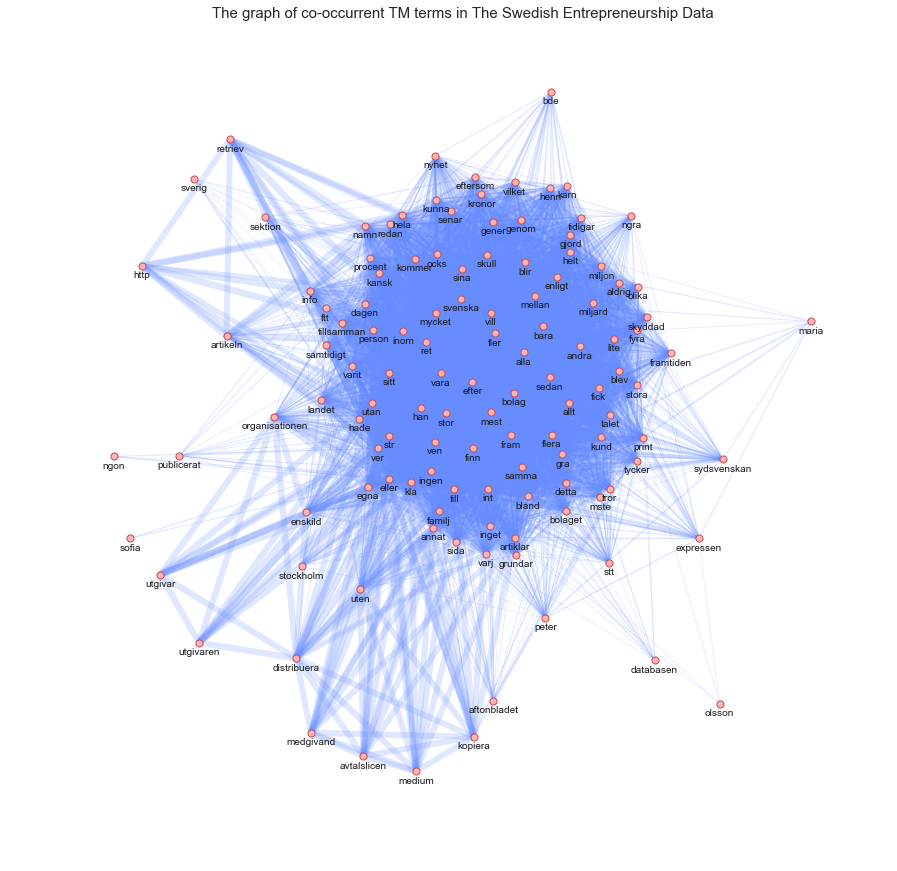

In [29]:
G = nx.MultiGraph()
G.add_edges_from(medges)
weight={(x,y):v for (x, y), v in Counter(G.edges()).items()}
w_edges=[(x,y,z) for (x,y),z in weight.items()]
Gw = nx.Graph()
Gw.add_weighted_edges_from(w_edges)

edge_width=[Gw[u][v]['weight'] for u,v in Gw.edges()]
# elabels = nx.get_edge_attributes(Gw,'weight')
edge_width=[math.log(1+w) for w in edge_width]
# [3*w for w in edge_width] 

figsize=(15,15)
pos=graphviz_layout(Gw) 
node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
G=Gw
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color,node_size=50)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width,alpha=0.2)
# nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edge_labels(G,pos,edge_labels=elabels);
plt.axis('off');
yoffset = {}
y_off = -3 #0.05  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset,font_size=10);
sst="The graph of co-occurrent TM terms in %s" %titlename
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

In [30]:
print len(G),len(G.edges())

123 4854


### Clustering keywords as communities of the co-occurrence graph

In [31]:
G=Gw

partition = community.best_partition(G)
# print partition

kk=len(set(partition.values()))
modularity=community.modularity(partition, G, weight='weight')
print 'The graph has', kk, 'communities and modularity coefficient equal to', modularity

cml=[]
for j in range(kk):
    cj=[]
    for k,v in partition.items():
        if v==j:
            cj.append(k)
    cml.append(cj)
cmd={}
for j in range(kk):
    cmd[tuple(cml[j])]=len(cml[j])
cmd
ocmd=sorted(cmd.iteritems(), key=operator.itemgetter(1), reverse=True)
eocmd=enumerate(ocmd)
commsd={}
louvain_comm_membership={}
for i in eocmd:
    print 'Community', i[0], 'with', i[1][1], 'nodes:', list(i[1][0])
    commsd[i[0]]=i[1][1] 
    ts=list(i[1][0])
    louvain_comm_membership[i[0]]=ts 

The graph has 3 communities and modularity coefficient equal to 0.318678375854
Community 0 with 85 nodes: [u'helt', u'samma', u'hade', u'vill', u'enligt', u'vara', u'andra', u'finn', u'bland', u'tror', u'varj', u'sektion', u'alla', u'ingen', u'bolag', u'eftersom', u'allt', u'inget', u'varit', u'senar', u'landet', u'tillsamman', u'fler', u'stor', u'framtiden', u'nyhet', u'miljon', u'kansk', u'skull', u'procent', u'stora', u'stt', u'vilket', u'stockholm', u'genom', u'sida', u'mycket', u'familj', u'henn', u'blev', u'kunna', u'gjord', u'efter', u'bara', u'blir', u'grundar', u'tycker', u'aldrig', u'dagen', u'peter', u'mste', u'bde', u'ftt', u'tidigar', u'redan', u'han', u'talet', u'till', u'gra', u'lite', u'ngra', u'publicerat', u'gener', u'karn', u'flera', u'fram', u'mellan', u'mest', u'ocks', u'kronor', u'sedan', u'inom', u'detta', u'fyra', u'samtidigt', u'sina', u'databasen', u'sitt', u'fick', u'bolaget', u'person', u'kommer', u'kund', u'miljard', u'olika']
Community 1 with 23 nodes: [u'

In [32]:
pos0=nx.circular_layout(nx.cycle_graph(4))

ocmd=sorted(cmd.iteritems(), key=operator.itemgetter(1), reverse=True)
eocmd=enumerate(ocmd)
for p,q in list(eocmd):
    if p==0:
        c1=list(list(q)[0])
    if p==1:
        c2=list(list(q)[0])
    if p==2:
        c3=list(list(q)[0])
#     if p==3:
#         c4=list(list(q)[0])

G1=Gw.subgraph(c1)
pos1=nx.circular_layout(G1) #.spring_layout(G1,1.)

G2=Gw.subgraph(c2)
pos2=nx.circular_layout(G2) #.spring_layout(G2,1.)

G3=Gw.subgraph(c3)
pos3=nx.circular_layout(G3) #.spring_layout(G3,1.)

# G4=Gw.subgraph(c4)
# pos4=nx.circular_layout(G4) #.spring_layout(G4,1.)

# GR=G.subgraph(npR)
# posR=nx.spring_layout(GR,1.)

def re_pos(pos,centre,radius):
    plist=[list(v) for v in pos.values()]
    nplist=[v for v in pos.values()]
    x = [p[0] for p in plist]
    y = [p[1] for p in plist]
    centroid = (sum(x) / float(len(plist)), sum(y) / float(len(plist)))
    ncentroid=np.array(centroid)
    rad=max([np.linalg.norm(nplist[i]-ncentroid) for i in range(len(nplist))])
    rpos={}
    for k,v in pos.items():
        rpos[k]=[(v[0]+centre[0])/float(radius),(v[1]+centre[1])/float(radius)]
    return rpos

centers=pos0.values()
centerm=[]
for i in range(len(centers)):
    t=[]
    for j in centers[i]:
        t.append(3*j)  
    centerm.append(np.array(t))
centers=centerm

radius=2. #1.5
pos1=re_pos(pos1,centers[0],0.5)  
pos2=re_pos(pos2,centers[1],radius)    
pos3=re_pos(pos3,centers[2],radius) 
# pos4=re_pos(pos4,centers[3],radius)
# posR=re_pos(posR,centers[4],radius)

# posAll=dict(pos1.items()+pos2.items()+[(k,pos1[k]+pos2[k]) for k in set(pos2)&set(pos1)])
posAll=dict(pos1.items()+pos2.items()+pos3.items()+[(k,pos1[k]+pos2[k]+pos3[k]) for k in set(pos3)&set(pos2)&set(pos1)])
# posAll=dict(pos1.items()+pos2.items()+pos3.items()+pos4.items()+[(k,pos1[k]+pos2[k]+pos3[k]+pos4[k]) for k in set(pos4)&set(pos3)&set(pos2)&set(pos1)])
# posAll=dict(pos1.items()+pos2.items()+pos3.items()+pos4.items()+posR.items()+[(k,pos1[k]+pos2[k]+pos3[k]+pos4[k]+posR[k]) for k in set(posR)&set(pos4)&set(pos3)&set(pos2)&set(pos1)])

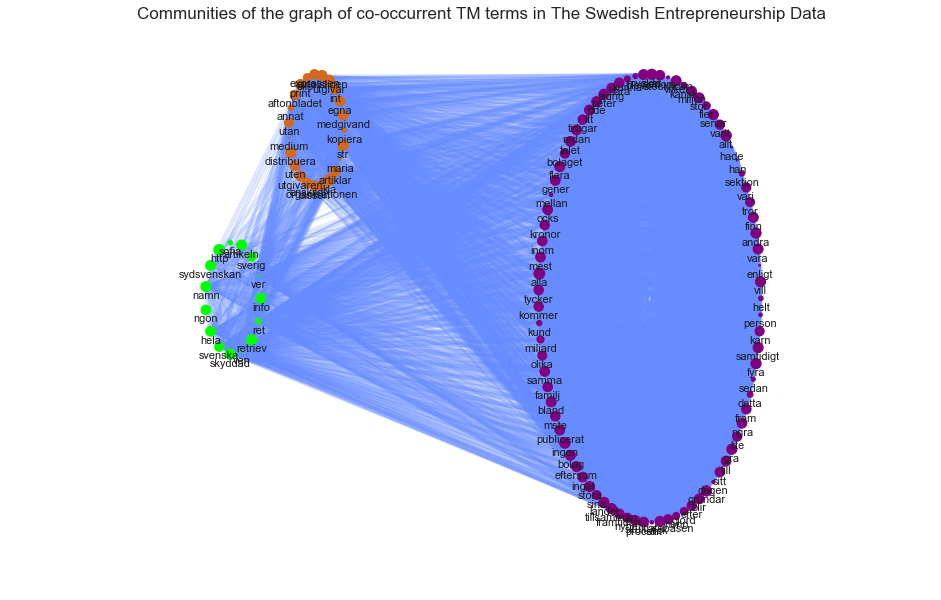

In [33]:
plt.figure(figsize=(16,10))

# pos2['Seven Wonders of the Invisible World']=(-1.4,1.4)
# posAll['Seven Wonders of the Invisible World']=(-1.4,1.4)

# labels={}
# for i in CGwi.nodes():
#     labels[i]=i #''

nsi=[Gw.degree(n) for n in Gw.nodes()]
# nodes = nx.draw_networkx_nodes(CGwi, pos, node_color=node_color,node_size=nsi,node_shape="s")
nx.draw_networkx_nodes(G1,pos=pos1,node_size=nsi,nodelist=c1,node_color='purple',alpha=1.);
nx.draw_networkx_nodes(G2,pos=pos2,node_size=nsi,nodelist=c2,node_color='chocolate',alpha=1.);
nx.draw_networkx_nodes(G3,pos=pos3,node_size=nsi,nodelist=c3,node_color='lime',alpha=1.);
# nx.draw_networkx_nodes(G4,pos=pos4,node_size=nsi,nodelist=c4,node_color='red',alpha=1.);
# nx.draw_networkx_nodes(GR,pos=posR,node_size=node_size,nodelist=npR,node_color='yellow',alpha=1.);
# nx.draw_networkx_nodes(G12,pos=pos12,node_size=dict(G.in_degree()).values(),nodelist=np12,node_color='orange',alpha=1.);
# nx.draw_networkx_nodes(G13,pos=pos13,node_size=dict(G.in_degree()).values(),nodelist=np13,node_color='violet',alpha=1.);
# nx.draw_networkx_nodes(G23,pos=pos23,node_size=node_size,nodelist=np23,node_color='crimson',alpha=1.);    
# nx.draw_networkx_nodes(G123,pos=pos123,node_size=150,nodelist=np123,node_color='yellow',alpha=1.);    
# nx.draw_networkx_nodes(G7,pos=pos7,node_size=500,nodelist=cmms[7],node_color=ppartition7.values(),font_size=20,alpha=1.);

nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(Gw, posAll, edge_color=edge_color,width=edge_width,alpha=0.2)
# nx.draw_networkx_labels(CGwi,posAll,labels=labels,font_size=13); 

# nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth,alpha=0.2);
# nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=25);



plt.axis('off');
yoffset = {}
y_off = -0.08 # offset on the y axis
for k, v in posAll.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Gw, yoffset, font_size=11);
sst="Communities of the graph of co-occurrent TM terms in %s" %titlename 
plt.title(sst,fontsize=17);
plt.margins(x=0.3, y=0.1) 